In [40]:
# -*- coding: utf-8 -*-
import torch
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.datasets import make_friedman1

# Exercici de Regressió

En aquest primer exercici el que es demana és que repetiu el mateix procés que el tutorial però en un problema una mica més complicat. La vostra xarxa haurà de tenir alguna capa més.

## Generació de les dades
Emprarem un conjunt de dades que s'autogenera a partir de certs paràmetres, la variable a predir es correspon amb la següent fórmula:

$y(X) = 10 * \sin(\pi * X[0] * X[1]) + 20 * (X[2] - 0.5)^2 + 10 * X[3] + 5 * X[4] + noise * N(0, 1).$

Com podeu observar tenim 5 variables útils i les altres que són independents de `y`.

[Més informació](https://projecteuclid.org/journals/annals-of-statistics/volume-19/issue-1/Multivariate-Adaptive-Regression-Splines/10.1214/aos/1176347963.full)

**ToDo**

- En aquesta passa només heu de separar les dades en conjunt d'entrenament i test. Les etiquetes del conjunt de test s'han de dir `y_test`.


In [47]:
X, y = make_friedman1(n_samples=2000, n_features=10, noise=0.0, random_state=33)

X = torch.from_numpy(X)
y =  torch.from_numpy(y)
X = X.float()
y = y.float()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

## Definició de la xarxa

**ToDo**
- Heu de definir la xarxa amb la qual voleu treballar, provau amb diferents arquitectures.
- Heu de definir la funció de pèrdua, podeu emprar MSE.

In [64]:
# Define la arquitectura de la red neuronal
model = torch.nn.Sequential(
    torch.nn.Linear(10, 15),
    torch.nn.Linear(15, 10),  
    torch.nn.Linear(10, 5),
    torch.nn.Linear(5, 1),   # Capa de entrada con 10 neuronas y capa oculta con 64 neuronas
    torch.nn.ReLU(),          # Función de activación ReLU
    torch.nn.Linear(1, 1)    # Capa de salida con 1 neurona (regresión)
)

# Define la función de pérdida (MSE)
criterion = torch.nn.MSELoss()

# Define el optimizador (por ejemplo, SGD)
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Entrenament

En aquesta part heu de definir el bucle d'entrenament:

**ToDo**

  - Predicció.
  - Càlcul de la funció de pèrdua.
  - Càlcul del descens del gradient.

Volem veure un gràfic on es mostri el valor de la funció de pèrdua pel conjunt d'entrenament i del conjunt de test a cada iteració.


/Users/joanbalaguer/opt/miniconda3/envs/aa2023/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1400])) that is different to the input size (torch.Size([1400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


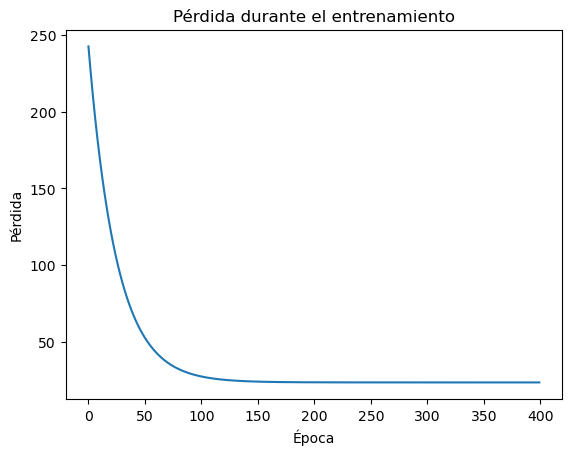

In [65]:
# Entrenament
num_epochs = 400
train_losses = []

for epoch in range(num_epochs):
    # Predicción
    outputs = model(x_train)
    
    # Cálculo de la función de pérdida
    loss = criterion(outputs, y_train)
    train_losses.append(loss.item())
    
    # Cálculo del descenso del gradiente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Dibuja el gráfico de pérdida
plt.plot(range(num_epochs), train_losses)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.show()


## Resultats

**ToDo**
- Dibuixar el gràfic emprant un gràfic on podrem comparar com de bons són els nostres resultats respecte els

Mean Squared Error en el conjunto de prueba: 23.943035125732422


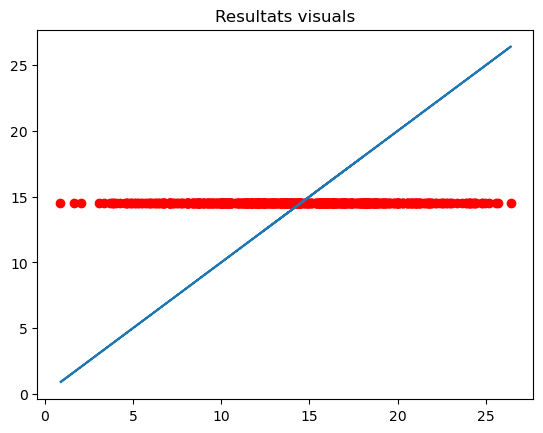

In [66]:
# Evaluam el model en el conjut de prova
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error en el conjunto de prueba: {mse}')

plt.title("Resultats visuals")
plt.scatter(y_test, y_pred.detach().numpy(), c="red")
plt.plot(y_test, y_test)
plt.show()